# **Aprendizaje no supervisado**
# UL09. Manifolds 

## <font color='blue'>**Manifolds Learning**</font>

Las distancias euclidianas pueden no funcionar para ciertos problemas debido a la geometría de los datos. Sin embargo, existe una serie de otras métricas que nos permite  superar esto, como por ejemplo  la distancia geodésica. ISOMAP es una de las variedades de aprendizaje más famosas, utiliza la distancia geodésica para comprender los datos.

## El concepto de manifolds

![Visualizando](https://drive.google.com/uc?export=view&id=11tHzEwTGu3Wx_vvfIOIwhz8yE6vLPrlP)

Localmente, la circunferencia parece una línea, que tiene una sola dimensión. En otros términos, una sola coordenada es suficiente para describir un pequeño arco de circunferencia. Consideremos, por ejemplo, la parte superior de la circunferencia, para la que la coordenada y es positiva (la parte amarilla en la figura 1). Cualquier punto de esta parte puede ser descrito por la coordenada x. Existe, por lo tanto, un homeomorfismo entre la parte amarilla de la circunferencia y el intervalo abierto [−1, 1] que representa cada punto de la circunferencia por su primera coordenada.

**Una variedad (Manifolds) n** es un espacio topológico que, en cada punto, tiene una vecindad que es homeomorfa al espacio euclidiano n-dimensional.

En topología, un **homeomorfismo**  es una función de un espacio topológico a otro, que cumple con ser una función biyectiva continua y cuya inversa es continua. En este caso, los dos espacios topológicos se dicen homeomorfos. Las propiedades de estos espacios que se conservan bajo homeomorfismos se denominan propiedades topológicas.




### Isomap/Isometric mapping

Es un algoritmo de aprendizaje de variedades que intenta preservar la distancia geodésica entre muestras mientras reduce la dimensión. Miremos un ejemplo concreto.



<img src='https://drive.google.com/uc?export=view&id=1VaWAPs3QN9i9pd4I9yR_xcj00oOaQwQf' width="300" align="left" style="margin-right: 20px"> 
<br>
<p style="font-size:8pt"> 


En la figura anterior, los datos forman una forma de espiral (no lineal). La línea roja determina la distancia geodésica entre x1 y x2, mientras que la línea azul representa la distancia euclidiana.

Como calculamos esta distancia. 


<img src='https://drive.google.com/uc?export=view&id=1tEyNB4l29TWQPvNwqS4Qa-DHi1CjpgP3' width="300" align="left" style="margin-right: 20px"> 
<br>
<p style="font-size:8pt"> 


### t-SNE



Adaptado de  (https://www.youtube.com/watch?v=NEaUSP4YerM)

¿Como podemos proyectar para generar una buena separación?

<img src='https://drive.google.com/uc?export=view&id=1TxA6Rsi7rF4hygJJN1K15vrTeylsgF09' width="300" align="left" > 
<br/>

Supongamos que el grupo de puntos los pondemos en forma aleatoria sobre la recta.

<br/>
<img src='https://drive.google.com/uc?export=view&id=1L34HWv0ZDojigUs-LmPJqbINtIz28h3W' width="300" align="left" style="margin-right: 20px"> 

Posteriormente vamos moviendo los puntos en terminos de la similitud entre los datos.


<img src='https://drive.google.com/uc?export=view&id=142OstQ7Sixs_guSEHksHAILFBs7-2FrB' width="600" align="left" style="margin-right: 20px"> 
¿Como medimos la similitud?, a traves de una matriz de similaridad.

<img src='https://drive.google.com/uc?export=view&id=1SOkscr5yRli4ZfonXMmnoZyVnYTpqPK8' width="300" align="left" style="margin-right: 20px"> 
<br>


¿Como se construye la matriz?

Mida las similitudes entre puntos en el espacio de alta dimensión. Piense en un montón de puntos de datos dispersos en un espacio 2D. Para cada punto de datos ($x_i$), centraremos una distribución gaussiana sobre ese punto. Luego medimos la densidad de todos los puntos ($x_j$) bajo esa distribución gaussiana. Luego renormalice para todos los puntos. Esto nos da un conjunto de probabilidades ($P_{ij}$) para todos los puntos. Esas probabilidades son proporcionales a las similitudes. Todo lo que eso significa es que, si los puntos de datos $x_1$ y $x_2$ tienen valores iguales bajo este círculo gaussiano, entonces sus proporciones y similitudes son iguales y, por lo tanto, tiene similitudes locales en la estructura de este espacio de alta dimensión. 
<img src='https://drive.google.com/uc?export=view&id=1bLpTxky0Vpq-inlVuvIwIWG6VVpV-LMy' width="300" align="left" style="margin-right: 20px"> 
<br>

<img src='https://drive.google.com/uc?export=view&id=1lYoKzTi9AX6QAQ3WsaVv3kFHJZXZXjar' width="300" align="left" style="margin-right: 20px"> 
<br>


En lugar de usar una distribución gaussiana, usa una distribución t de Student con un grado de libertad, que también se conoce como distribución de Cauchy . Esto nos da un segundo conjunto de probabilidades ($Q_{ij}$) en el espacio de baja dimensión. Como puede ver, la distribución t de Student tiene colas más pesadas que la distribución normal. Las colas pesadas permiten un mejor modelado de distancias alejadas. Lo cual permite una mejor separación de los puntos.

El último paso es que queremos que este conjunto de probabilidades del espacio de baja dimensión ($Q_{ij}$) refleje las del espacio de alta dimensión ($P_{ij}$) de la mejor manera posible. Queremos que las dos estructuras del mapa sean similares. Medimos la diferencia entre las distribuciones de probabilidad de los espacios utilizando la divergencia de Kullback-Liebler (KL). Finalmente, usamos el descenso de gradiente para minimizar nuestra función de costo KL.


<img src='https://drive.google.com/uc?export=view&id=1neC3oHl0ggab5qn5sfwyozfB3jkYKMPZ' width="600" align="Centered" style="margin-right: 20px"> 










## <font color='green'>Actividad 1</font>

Vamos a trabajar con el dataset de digitos. 

1. Carge la libreria de digitos y explorela.
2. Aplique los métodos de reducción de dimensionalidad t-SNE, PCA, Kernel-PCA y ISOMAP.
3. Visualice las primeras componentes y selecciones el metodo que genera la mejor separación. Comprenda y utilice la funcion plot_embedding la cual es proporcionada en el código. 
4. Construya un modelo que prediga el valor de un digito.


In [35]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

In [36]:
 digits = datasets.load_digits()

In [37]:
data = digits.data

In [38]:
data.shape

(1797, 64)

In [39]:
X_embedded = manifold.TSNE(n_components=2, learning_rate='auto',
              init='random').fit_transform(data)
X_embedded.shape

(1797, 2)

In [40]:
digits.images.shape

(1797, 8, 8)

In [41]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    # Estamos normalizando los datos.
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    # for i in range(X.shape[0]):
    #   # Posición y valor del texto.
    #     plt.text(X[i, 0], X[i, 1], str(y[i]),
    #              color=plt.cm.Set1(y[i] / 10.),
    #              fontdict={'weight': 'bold', 'size': 9})
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

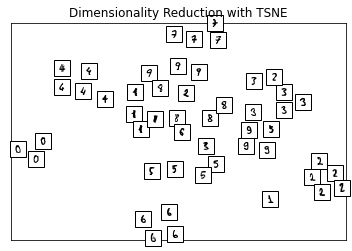

In [42]:
plot_embedding(X_embedded, title = "Dimensionality Reduction with TSNE")

In [43]:
pca = decomposition.PCA(n_components=2)
X_embedded_pca = pca.fit_transform(data)

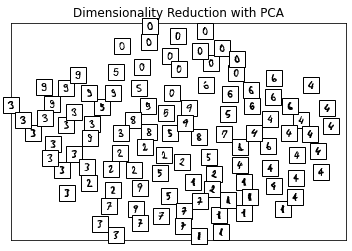

In [44]:
plot_embedding(X_embedded_pca, title = "Dimensionality Reduction with PCA")

In [45]:
transformer = decomposition.KernelPCA(n_components=2, kernel='rbf')
X_transformed = transformer.fit_transform(data)
X_transformed.shape

(1797, 2)

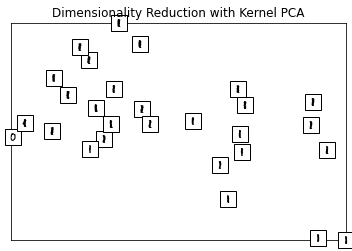

In [46]:
plot_embedding(X_transformed, title = "Dimensionality Reduction with Kernel PCA")

In [49]:
embedding = manifold.Isomap(n_components=2, n_neighbors=30)
X_transformed_iso = embedding.fit_transform(data)
X_transformed_iso.shape

(1797, 2)

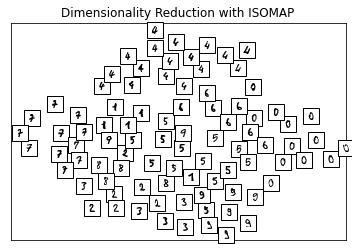

In [50]:
plot_embedding(X_transformed_iso, title = "Dimensionality Reduction with ISOMAP")

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

<font color='green'>Fin Actividad 1</font>

## <font color='green'>Actividad 2</font>
Una aplicación de las diferentes técnicas de aprendizaje en variedades a un conjunto de datos esféricos. Aquí se puede ver el uso de la reducción de dimensionalidad para ganar algo de intuición sobre los algunos métodos de aprendizaje en variedades. 

In [51]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state


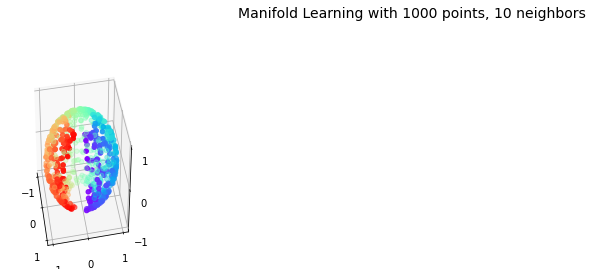

In [52]:
# Create our sphere.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

### Aplique los metodos t-SNE, ISOMAP y PCA a un dataset esférico

1. Transforme el dataset
2. Visualice las primeras dos componentes en un grafico tipo scatter.
3. Discuta los resultados. 

In [64]:
sphere_data.shape

(720, 3)

In [ ]:
import seaborn as sns

(2, 720)


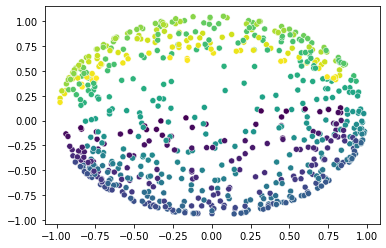

In [71]:
pca = decomposition.PCA(
        n_components=2, random_state=42
    )
X_pca = pca.fit_transform(sphere_data).T

print(X_pca.shape)

sns.scatterplot(x = X_pca[0], y = X_pca[1] ,c=colors)

(2, 720)


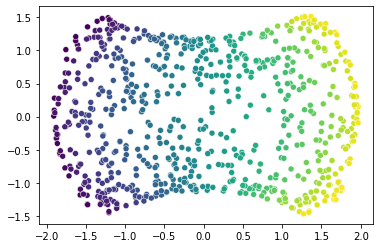

In [72]:
X_iso = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)

print(X_iso.shape)

sns.scatterplot(x = X_iso[0], y = X_iso[1], c=colors)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(2, 720)


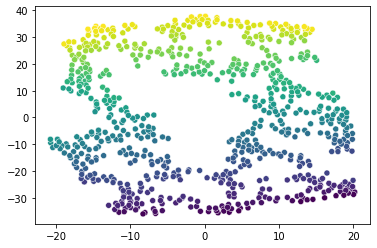

In [73]:
tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
X_tsne = tsne.fit_transform(sphere_data).T

print(X_tsne.shape)

sns.scatterplot(x = X_tsne[0], y = X_tsne[1], c=colors)

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**ICA**</font>

<img src='https://drive.google.com/uc?export=view&id=1yw5sr8I343k1IzRYLL5PobeMRKgFjq-h' width="500" align="centered" > 
<br/>



Análisis de Componentes Independientes, o ICA para abreviar. ICA es un método computacional para separar una señal multivariante en sus componentes subyacentes. Con ICA, podemos extraer el componente deseado de la fusión de múltiples señales.


## Precondiciones

La primera condición previa para que funcione el algoritmo es que las señales mixtas sean una combinación lineal de cualquier número de señales fuente. 

La segunda condición previa es que las señales fuente sean independientes. Entonces, ¿qué significa independencia? Dos señales son independientes si la información de la señal s1 no proporciona ninguna información sobre la señal s2. Esto implica que no están correlacionados, lo que significa que su covarianza es 0. Sin embargo, hay que tener cuidado aquí, ya que la falta de correlación no significa automáticamente independencia. 

La tercera condición previa es que los componentes independientes no sean gaussianos. ¿Porqué es eso? La distribución de densidad conjunta de dos señales independientes no gaussianas será uniforme en un cuadrado; 

<img src='https://drive.google.com/uc?export=view&id=15IoR2qwlWt1HZJKsszrfarJz3LRoxJiY' width="500" align="centered" > 
<br/>


En un nivel general, ICA se puede dividir en los siguientes pasos.
1. Centro x restando la media
2. *Whitening* W
3. Elija un valor inicial aleatorio para la matriz de desmezcla W
4. Calcule el nuevo valor de W
5. Normalizar W
6. Compruebe si el algoritmo ha convergido y, si no, vuelva al paso 4
7. Tome el producto escalar de W y x para obtener las señales de fuente independientes




Que significa *Whitening*

*Whitening* una señal dada significa que la transformamos de tal manera que se eliminan las correlaciones potenciales entre sus componentes (covarianza igual a 0) y la varianza de cada componente es igual a 1. Otra forma de verlo es que el La matriz de covarianza de la señal *Whitening* será igual a la matriz de identidad.

<img src='https://drive.google.com/uc?export=view&id=1PCZzIT9xNs67kyI2_Kij3kHAgshylqww' width="500" align="centered" > 
<br/>


```
def whitening(X):
    cov = np.cov(X) # Matria de covarianza
    d, E = np.linalg.eigh(cov) # Autovalores y Autovectores
    D = np.diag(d) # Matriz de 3x3 con los valores de los autovalores
    D_inv = np.sqrt(np.linalg.inv(D)) # Invertimos para que valgan 1.
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    return X_whiten
```



¿Cómo funciona? Como se discutió anteriormente, una condición previa para que ICA funcione es que nuestras señales de origen no sean gaussianas. Una cosa interesante acerca de dos señales independientes no gaussianas es que su suma es más gaussiana que cualquiera de las señales fuente. Por lo tanto, necesitamos optimizar W de manera que las señales resultantes de Ax sean lo más no gaussianas posible. Para hacerlo, necesitamos una medida de gaussianidad. La medida más simple sería la curtosis, que es el cuarto momento de los datos y mide la "cola" de una distribución. Sin embargo para una mejor convergencia se utiliza

<img src='https://drive.google.com/uc?export=view&id=1cuk5wIGScLWXc1pIiGLN3qPaYKeI0vEV' width="500" align="centered" > 
<br/>

*Tichavský, P., Koldovský, Z., & Oja, E. (2007, September). Speed and accuracy enhancement of linear ICA techniques using rational nonlinear functions. In International Conference on Independent Component Analysis and Signal Separation (pp. 285-292). Springer, Berlin, Heidelberg.*


$$g(\mu) = \tanh(\mu)$$ junto con su derivada
$$g'(\mu) = 1 - \tanh^2(\mu)$$



## <font color='green'>Actividad 3</font>

Considere las siguientes señales:



```
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time)) # square signal
s3 = signal.sawtooth(2 * np.pi * time)
```

1. Grafique las señales originales

2. Combine las señales como por ejemplo :


```
X = np.c_[s1, s2, s3]
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(X, A.T)
```
4. Grafique las señales mezcladas
5. Aplique FastICA y vuelva a graficar.
6. Compare con PCA.



In [74]:
import numpy as np
np.random.seed(0)
from scipy import signal
from scipy.io import wavfile
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA

In [75]:
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time)) # square signal
s3 = signal.sawtooth(2 * np.pi * time)

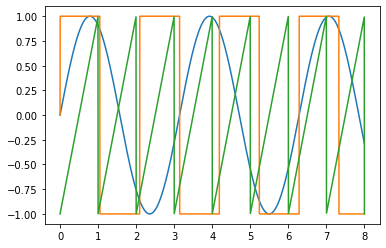

In [77]:
sns.lineplot(y = s1, x = time)
sns.lineplot(y = s2, x = time)
sns.lineplot(y = s3, x = time)

In [78]:
X = np.c_[s1, s2, s3]
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(X, A.T)

In [80]:
X.shape

(2000, 3)

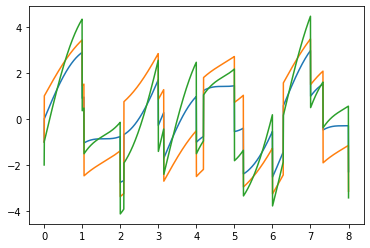

In [95]:
sns.lineplot(y = X[:,0], x = time)
sns.lineplot(y = X[:,1], x = time)
sns.lineplot(y = X[:,2], x = time)

In [96]:
transformer = FastICA(n_components=3,
        random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(2000, 3)

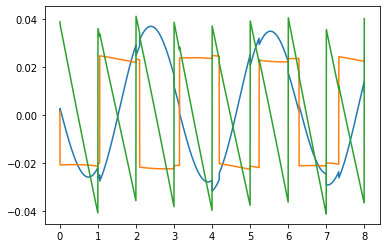

In [97]:
sns.lineplot(y = X_transformed[:,0], x = time)
sns.lineplot(y = X_transformed[:,1], x = time)
sns.lineplot(y = X_transformed[:,2], x = time)

In [99]:
pca = decomposition.PCA(n_components=3)
H = pca.fit_transform(X)
H.shape

(2000, 3)

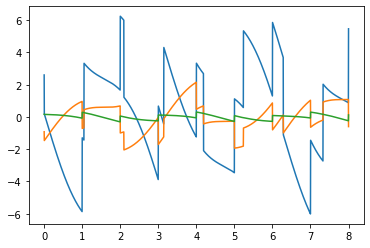

In [100]:
sns.lineplot(y = H[:,0], x = time)
sns.lineplot(y = H[:,1], x = time)
sns.lineplot(y = H[:,2], x = time)

La transformación realizada con FastICA parece ser mucho más parecida a la original. En comparación con PCA, podemos notar que realiza una separación mucho más adecuada de cada señal, tanto en la forma como en la magnitud.

<font color='green'>Fin Actividad 3</font>